In [1]:
import numpy
import pandas
import joblib
import seaborn

%matplotlib inline

# Instructions

- Read **the train data** from the CSV file and properly set the index
- Load the trained model

In [2]:
data_train = pandas.read_csv('./data/features.train.csv').set_index('id')
data_train

,feature_1,feature_2,label
id,,,
253,2.2189,0.3114,1
667,-0.2929,0.3086,1
85,0.6741,-0.4251,1
969,0.9695,-0.5618,1
75,-1.5488,0.6378,0
...,...,...,...
835,0.6986,-0.2398,1
192,-0.4636,0.5754,0
629,0.6531,0.2976,0


In [3]:
model = joblib.load('model/model.joblib')
model

LogisticRegression(fit_intercept=False, penalty=None, random_state=0)

# Instructions

- Create a `pandas.DataFrame` with columns `feature_1`, `feature_2`
- Each row represents a point in the feature space lying around the training samples
  - Hint: use the minimum and maximum of `feature_1` and `feature_2`
- These points should form 50$\times$50 evenly spaced grid points
  - Hint: use `numpy.linspace`, `numpy.meshgrid`
- Note that this (approximately) serves as all possible data points in the space
- Use `seaborn.scatterplot` to plot the dataframe of grid points



In [4]:
range_feature_1 = numpy.linspace(data_train['feature_1'].min(), data_train['feature_1'].max(), 50)
range_feature_2 = numpy.linspace(data_train['feature_2'].min(), data_train['feature_2'].max(), 50)

features = numpy.meshgrid(range_feature_1, range_feature_2)

data_meshgrid = pandas.DataFrame({
    'feature_1': features[0].reshape(-1), 
    'feature_2': features[1].reshape(-1),
})
data_meshgrid

,feature_1,feature_2
0,-1.548800,-1.0887
1,-1.463965,-1.0887
2,-1.379131,-1.0887
3,-1.294296,-1.0887
4,-1.209461,-1.0887
...,...,...
2495,2.268761,1.8052
2496,2.353596,1.8052
2497,2.438431,1.8052
2498,2.523265,1.8052


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='feature_1', ylabel='feature_2'>

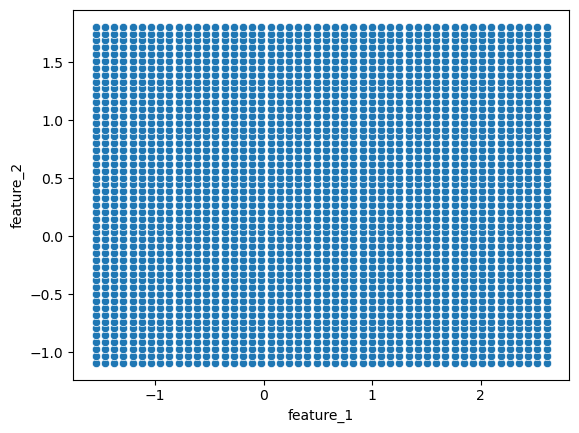

In [5]:
seaborn.scatterplot(
    data_meshgrid,
    x   = 'feature_1',
    y   = 'feature_2',
)

# Instructions

- Explain what a decision boundary is (using Markdown language)
- Describe how grid points can be used to contruct the model decision boundary
- Describe what the model decision boundary should look like 
- Now, add `probability` and `prediction` columns to the dataframe of grid points

In [6]:
probabilities_from_sklearn = model.predict_proba(data_meshgrid[['feature_1', 'feature_2']])
probabilities_from_sklearn[:10]

array([[0.14960981, 0.85039019],
       [0.13490101, 0.86509899],
       [0.12143181, 0.87856819],
       [0.10913777, 0.89086223],
       [0.09794965, 0.90205035],
       [0.08779543, 0.91220457],
       [0.07860215, 0.92139785],
       [0.07029734, 0.92970266],
       [0.06281017, 0.93718983],
       [0.05607234, 0.94392766]])

In [7]:
data_meshgrid['probability'] = probabilities_from_sklearn[:, 1]
data_meshgrid['prediction']  = model.predict(data_meshgrid[['feature_1', 'feature_2']])
data_meshgrid

,feature_1,feature_2,probability,prediction
0,-1.548800,-1.0887,0.850390,1
1,-1.463965,-1.0887,0.865099,1
2,-1.379131,-1.0887,0.878568,1
3,-1.294296,-1.0887,0.890862,1
4,-1.209461,-1.0887,0.902050,1
...,...,...,...,...
2495,2.268761,1.8052,0.035334,0
2496,2.353596,1.8052,0.039685,0
2497,2.438431,1.8052,0.044546,0
2498,2.523265,1.8052,0.049972,0


# Instructions

- Plot a hard decision boundary using `prediction`
- Export the decision boundary to `./results/decision_boundary.png`
- Plot a soft decision boundary using `probability`
  - Hint: use `probability` as the `hue` parameter
- Plot a soft decision boundary and overlay training samples on it
  - Hint: use `probability` as the `hue` parameter


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

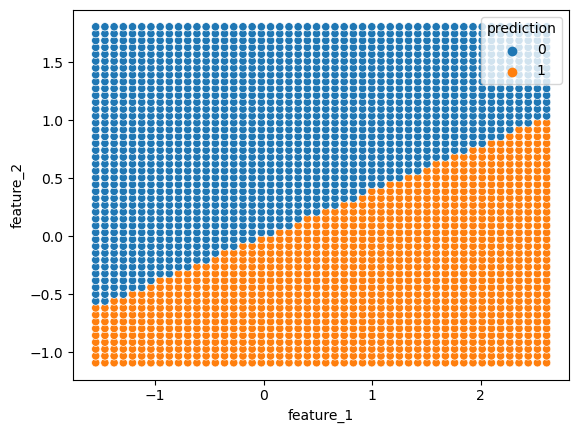

In [8]:
axis = seaborn.scatterplot(
    data_meshgrid,
    x   = 'feature_1',
    y   = 'feature_2',
    hue = 'prediction',
)


In [9]:
figure = axis.get_figure()
figure.savefig("./results/decision_boundary.png")

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='feature_1', ylabel='feature_2'>

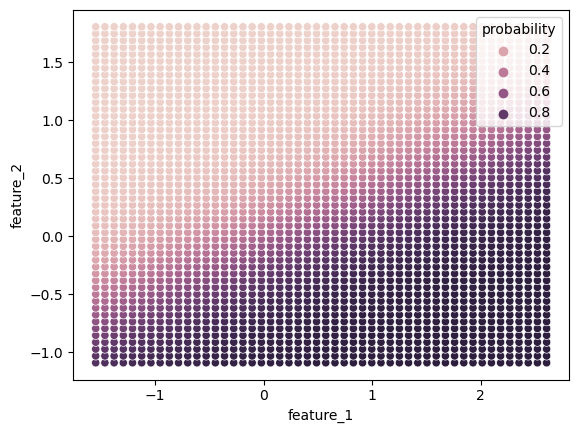

In [10]:
seaborn.scatterplot(
    data_meshgrid,
    x   = 'feature_1',
    y   = 'feature_2',
    hue = 'probability',
)


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

<Axes: xlabel='feature_1', ylabel='feature_2'>

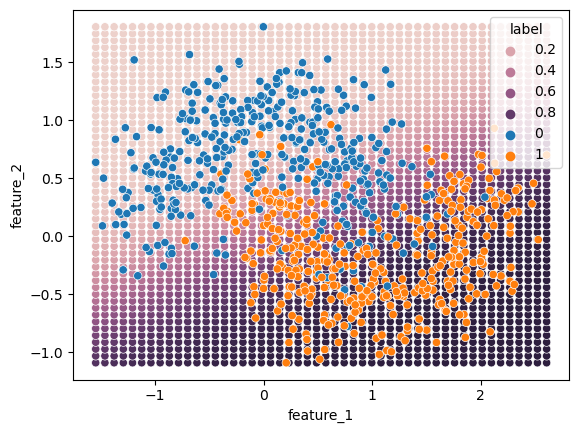

In [11]:
seaborn.scatterplot(
    data_meshgrid,
    x   = 'feature_1',
    y   = 'feature_2',
    hue = 'probability',
)

seaborn.scatterplot(
    data_train,
    x   = 'feature_1',
    y   = 'feature_2',
    hue = 'label'
)